# 3장 : 신경망
앞 장 배운 퍼셉트론 관련해서는 좋은 소식과 나쁜 소식이 있다. 좋은 소식은 퍼셉트론으로 복잡한 함수도 표현할 수 있다는 것이다. 그 예로 컴퓨터가 수행하는 복잡한 처리도 퍼셉트론으로 (이론상) 표현할 수 있다는 것이다. 그 예로 컴퓨터가 수행하는 복잡한 처리도 퍼셉트론으로는 (이론상) 표현할 수 있음을 앞 장에서 설명하였다. 나쁜 소식은 가중치를 설정하는 작업(원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업)은 여전히 사람이 수동으로 한다는 것이다. 앞 장에서는 AND, OR 게이트의 진리표를 보면서 우리 인간이 적절한 가중치 값을 정했다.  

신경망은 이 나쁜 소식을 해결해준다! 무슨 말인고 하니, 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 이제부터 살펴볼 신경망의 중요한 성질이다. 이번 장에서는 신경망의 개요를 설명하고, 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 자세히 알아보도록 한다. 아쉽지만 데이터에서 가중치 매개변수 값을 학습하는 방법은 다음 장까지 기다려야 한다.

## 3.1 퍼셉트론에서 신경망으로
신경망은 앞 장에서 설명한 퍼셉트론과 공통점이 많다. 이번 절에서는 퍼셉트론과 다른 점을 중심으로 신경망의 구조를 설명한다.

### 3.1.1 신경망의 예

신경망을 그림으로 나타내면 [그림 3-1]처럼 된다. 여기에서 가장 왼쪽 줄을 $\scriptsize\textbf{입력층}$, 맨 오른쪽 줄을 $\scriptsize\textbf{출력층}$, 중간 줄을 $\scriptsize\textbf{은닉층}$이라고 한다. 이 책에서는 입력층에서 출력층 방향으로 차례로 0층,1층,2층이라고 정의하도록 한다.(층 번호를 0부터 시작하는 이유는 파이썬 배열의 인덱스도 0부터 시작하여, 나중에 구현할때 짝짓기 편하기 때문이다.)

#### [그림3-1] 신경망의 예

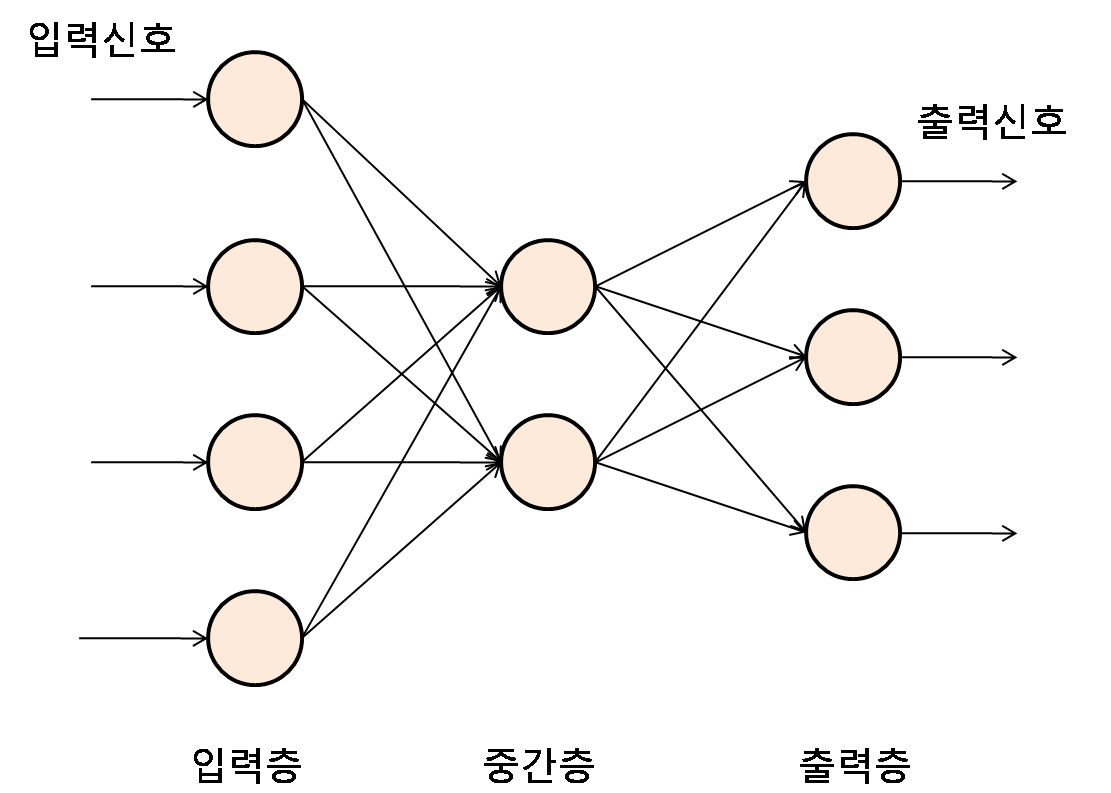

In [3]:
from PIL import Image
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-1.png")

$\textbf{WARNING}$     
> [그림3-1]의 신경망은 모두 3층으로 구성되지만, 가중치를 갖는 층은 2개뿐이기 때문에 '2층 신경망'이라고 한다. 문헌에 따라서는 신경망을 구성하는 층수를 기준으로 [그림3-1]을 '3층 신경망'이라고 하는 경우도 있으니 주의해야 한다. 이 책에서는 실제로 가중치를 갖는 층의 개수(입력층,은닉층,출력층의 합계에서 1을 뺀 값)를 기준으로 하겠다.

[그림3-1]은 앞 장에서 본 퍼셉트론과 특별히 달라 보이지 않는다. 실제로 뉴런이 연결되는 방식은 앞 장의 퍼셉트론에서 달라진 것이 없다. 자, 그럼 신경망에서는 신호를 어떻게 전달하는 것인지 이제부터 알아보도록 하자.

### 3.1.2 퍼셉트론 복습
신경망의 신호 전달 방법을 보기 전에 퍼셉트론을 살짝 복습해보자. 먼저 [그림3-2]와 같은 구조의 네트워크를 생각해보자.

#### [그림3-2] 퍼셉트론 복습

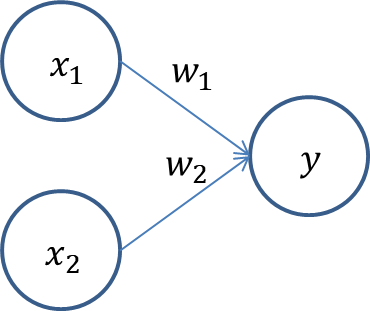

In [4]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-2.png")

[그림3-2]는 $x_1$과 $x_2$라는 두 신호를 입력받아 $y$를 출력하는 퍼셉트론이다. 이 퍼셉트론을 수식으로 나타내면 다음과 같다:

\begin{equation}
    y =
    \begin{cases}
        0 ~~~(b+ w_{1}x_1 + w_2 x_2 \leq 0) \\
        1 ~~~(b+ w_{1}x_1 + w_2 x_2 > 0)
    \end{cases}
\end{equation} \tag{3.1}

여기서 $b$는 $\scriptsize\textbf{편향}$을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다. 한편, $w_1$과 $w_2$는 각 신호의 $\scriptsize\textbf{가중치}$를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.

그런데 [그림3-2]의 네트워크에는 편향 $b$가 보이지 않는다. 여기에 편향을 명시한다면 [그림3-3]과 같이 나태낼 수 있다.

#### [그림3-3] 편향을 명시한 퍼셉트론

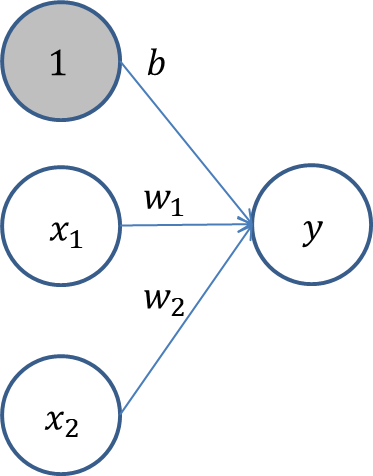

In [5]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-3.png")

[그림3-3]에서는 가중치가 $b$이고 입력이 1인 뉴런이 추가되었따. 이 퍼셉트론의 동작은 $x_1,x_2,1$이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달된다. 다음 뉴런에서는 이 신호들의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다. 참고로, 편향의 입력신호는 항상 1이기 때문에 그림에서는 해당 뉴런을 회색으로 채워 다른 뉴런과 구별하였다.

식(3.1)을 더 간결한 형태로 작성해보록 한다. 이를 위해서 조건 분기의 동작(0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력)을 하나의 함수로 나타내도록 하자. 이 함수를 $h(x)$라고 하면 식(3.1)을 다음과 같이 식(3.2)와 식(3.3) 으로 표현할 수 있다.

\begin{equation}
    y = h(b+w_1 x_1 + w_2 x_2)
\end{equation} \tag{3.2}

\begin{equation}
    y = 
    \begin{cases}
        0~~~(x \leq 0) \\
        1~~~(x > 0)
    \end{cases}
\end{equation} \tag{3.3}

### 3.1.3 활성화 함수의 등장

조금 전 $h(x)$라는 함수가 등장했는데, 이처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 $\scriptsize\textbf{활성화 함수}^{\text{activation function}}$이라 한다. '활성화' 라는 이름이 말해주듯 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 한다.

식 (3.2)를 다시 써보자. 식 (3.2)는 가중치가 곱해진 입력 신호의 총합을 계산하고, 그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다. 따라서 이 식은 다음과 같은 2개의 식으로 표현될 수 있다.

\begin{equation}
    a = b + w_1 x_1 + w_2 x_2
\end{equation} \tag{3.4}

\begin{equation}
    y = h(a)
\end{equation} \tag{3.5}

식 (3.4)는 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 $a$라고 한다. 그리고 식 (3.5)는 $a$를 함수 $h()$에 넣어 $y$를 출력하는 흐름과 같다.

지금까지와 같이 뉴런을 큰 원($\circ$) 으로 그려보면 식 (3.4)와 식 (3.5)는 [그림3-4]처럼 나타낼 수 있다.

#### [그림3-4] 활성화 함수의 처리 과정

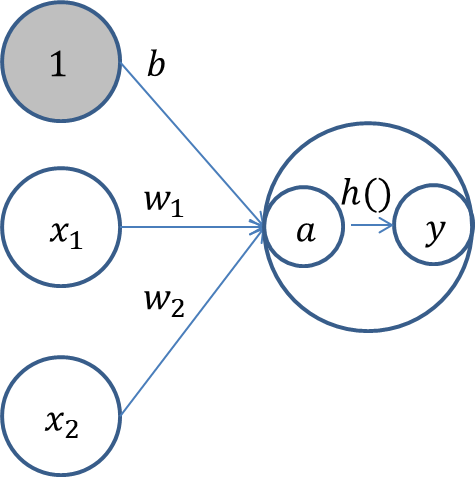

In [6]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-4.png")

보다시피 [그림3-4]에서는 기존 뉴런의 원을 키우고, 그 안에 활성화 함수의 처리 과정을 명시적으로 그려 넣었다. 즉, 가중치 신호를 조합한 결과가 $a$라는 노드가 되고, 활성화 함수 $h()$를 통과하여 $y$라는 노드로 변환되는 과정이 분명하게 나타나 있다. 참고로 이 책에서는 $\scriptsize\textbf{뉴런}$과 $\scriptsize\textbf{노드}$라는 용어를 같은 의미로 사용한다. 방금 $a$와 $y$의 원을 노드라고 했는데, 이는 지금까지 뉴런이라고 한 것과 같은 의미를 가진다.

뉴런을 그릴 때 보통은 지금까지와 마찬가지로 [그림3-5]의 왼쪽처럼 뉴런을 하나의 원으로 그린다. 그리고 신경망의 동작을 좀 더 명확히 드러내고자 할 때는 오른쪽 그림처럼 활성화 처리 과정을 명시하기도 한다.

#### [그림3-5] 왼쪽은 일반적인 뉴런, 오른쪽은 활성화 처리 과정을 명시한 뉴런

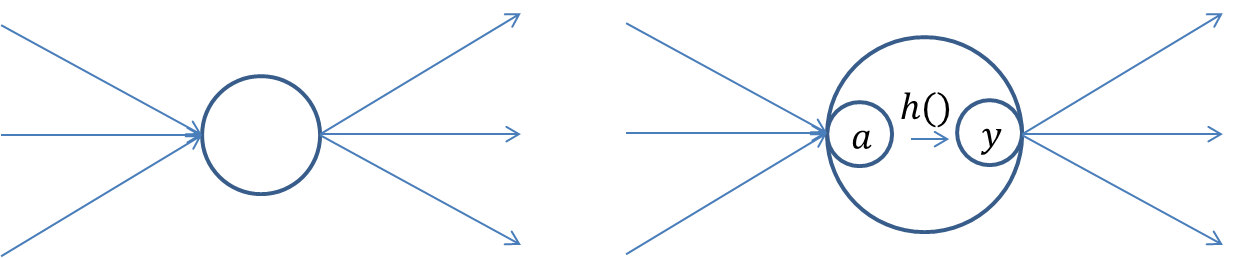

In [7]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-5.png")

그럼 계속해서 활성화 함수와 더 친해져보기로 하자. 이 활성화 함수가 퍼셉트론에서 신경망으로 가기 위한 길잡이이다.

$\textbf{WARNING}$     
> 이 책에서는 퍼셉트론이라는 말이 가리키는 알고리즘을 엄밀히 통일하지는 않았다. 일반적으로 $\scriptsize\textbf{단순 퍼셉트론}$은 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 가리키고 $\scriptsize\textbf{다층 퍼셉트론}$은 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)을 가리킨다.

## 3.2 활성화 함수
식 (3.3)과 같은 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 $\scriptsize\textbf{계단 함수}^{\text{step function}}$라 한다. 그래서 '퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다'라 할 수 있다. 즉, 활성화 함수로 쓸 수 있는 여러 후보 중에서 퍼셉트론은 계단 함수를 채용하고 있다. 그렇다면 계단 함수 이외의 함수를 사용하면 어떻게 될까? 실은 활성화 함수를 계단 함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 열쇠이다! 그럼 얼른 신경망에서 이용하는 활성화 함수들에 대하여 알아보도록 하자.

### 3.2.1 시그모이드 함수
다음은 신경망에서 자주 이용하는 활성화 함수인 $\scriptsize\textbf{시그모이드 함수}^{\text{sigmoid function}}$를 나타낸 식이다.

\begin{equation}
    h(x) = \cfrac{1}{1+\exp (-x)}
\end{equation} \tag{3.6}

식 (3.6)에서 $\exp (-x)$는 $e^{-x}$를 뜻하며, $e$는 자연상수로 약 2.7182의 값을 갖는 실수이다. 식 (3.6)으로 나타나는 시그모이드 함수는 얼핏 복잡해 보이지만 이 역시 단순한 '함수'일 뿐이다. 함수는 입력을 주면 출력을 돌려주는 변환기일 뿐이다. 예를 들어 시그모이드 함수에 1.0과 2.0을 입력하면 $h(1.0) = 0.731...,h(2.0)=0.880...$처럼 특정 값을 출력한다.

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다. 사실 앞 장에서 본 퍼셉트론과 앞으로 볼 신경망의 주된 차이는 이 활성화함수 뿐이다. 그 외에 뉴런이 여러 층으로 이어지는 구조와 신호를 전달하는 방법은 기본적으로 앞에서 살펴본 퍼셉트론과 같다. 그러면 활성화 함수로 이용되는 시그모이드 함수를 계단 함수와 비교하면서 자세히 살펴보도록 하자.

### 3.2.2 계단 함수 구현하기
이번 절과 다음 절에서는 파이썬으로 계단 함수를 한 번 그려보도록 한다.(함수의 형태를 눈으로 확인해보면 그 함수를 이해하는데 큰 도움이 된다.) 계단 함수는 식 (3.3)과 같이 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수이다. 다음은 이러한 계단 함수를 단순하게 구현한 것이다.

In [8]:
import numpy as np

In [9]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

이 구현은 단순하고 쉽지만, 인수 x는 실수(부동소수점)만 받아들인다. 즉, `step_function(3.0)`은 되지만 넘파이 배열을 인수로 넣을 수는 없다. 가령 `step_function(np.array([1.0, 2.0]))`은 안된다. 우리는 앞으로를 위해 넘파이 배열도 지원하도록 수정하고 싶다. 그러기 위해서는 가령 다음과 같은 구현을 생각할 수 있겠다.

In [10]:
def step_function(x):
    y = x > 0
    return y.astype(int)

겨우 두 줄이라 엉성해 보이겠지만, 이는 넘파이의 편리한 트릭을 사용한 덕분이다. 어떤 트릭을 썼는지는 다음에 나올 예를 통해 알아보도록 하자. 다음 예에서는 x라는 넘파이 배열을 준비하고 그 넘파이 배열에 부등호 연산을 수행한다.

In [11]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
print(y.dtype)

[-1.  1.  2.]
[False  True  True]
bool


넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 `bool` 배열이 생성된다. 이 예에서는 배열 `x`의 원소 각각이 0보다 크면 `True`로, 0 이하면 `False`로 변환한 새로운 배열 `y`가 생성된다.  

이 `y`는 `bool`배열이다. 그런데 우리가 원하는 계단 함수는 0이나 1의 '`int`형'을 출력하는 함수이다. 그래서 배열 `y`의 원소를 `bool`에서 `int`형으로 바꿔줘야 한다.

In [12]:
y = y.astype(int)
y

array([0, 1, 1])

이처럼 넘파이 배열의 자료형을 변환할 때는 `astype()` 메서드를 이용한다. 원하는 자료형을 인수로 지정하면 된다. 그리고 파이썬에서는 True, False를 1, 0으로 간주한다. 따라서 `astype()` 메서드를 사용하여 넘파이 배열의 자료형을 변환하면 True, False를 1, 0으로 변환할 수 있다. 이상이 바로 계단 함수의 구현이다.

In [13]:
y = y.astype(bool)
y

array([False,  True,  True])

In [14]:
y = y.astype(str)
y

array(['False', 'True', 'True'], dtype='<U5')

### 3.2.3 계단 함수의 그래프
이제 앞에서 정의한 계단 함수를 그래프로 그려보자. 이를 위해 `matplotlib` 라이브러리를 사용하도록 한다.

In [15]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

#### [그림3-6] 계단 함수의 그래프

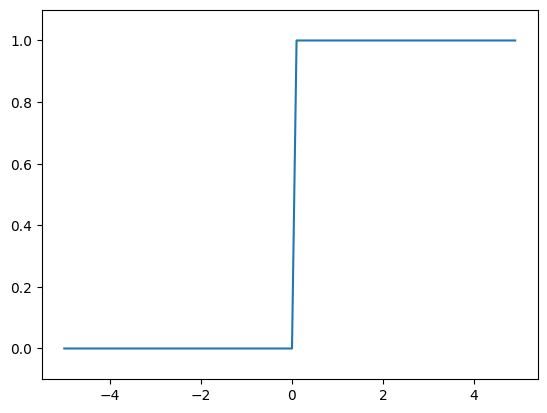

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

[그림3-6]에서 보듯 계단 함수는 0을 경계로 출력이 0에서 1 (또는 1에서 0)으로 바뀐다. 이제 '계단'함수로 불리는 이유를 알 것이다. 바로 이 그림처럼 값이 바뀌는 형태가 마치 계단처럼 생겼기 때문이다.

### 3.2.4 시그모이드 함수 구현하기
이어서 시그모이드 함수를 구현해보자. 식 (3.6)의 시그모이드 함수는 파이썬으로 다음과 같이 작성할 수 있다.

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

이 함수가 넘파이 배열도 처리할 수 있는 이유는 넘파이의 브로드캐스트 기능 덕분이다. 브로드캐스트란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것이다. 복습 겸 예를 들어보자.

In [19]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t


array([2., 3., 4.])

In [20]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

이 예에서는 스칼라값 1.0과 넘파이 배열 t의 각 원소 간에 덧셈과 나눗셈을 수행하였다. 이 경우 넘파이 배열 t의 원소 각각에 대해 연산이 이뤄진다. 앞에서 구현한 `sigmoid`함수에서도 `np.exp(-x)`가 넘파이 배열을 반환하기 때문에 `1/(1+np.exp(-x))`도 넘파이 배열의 각 원소에 연산을 수행한 결과를 내준다.

#### [그림3-7] 시그모이드 함수의 그래프

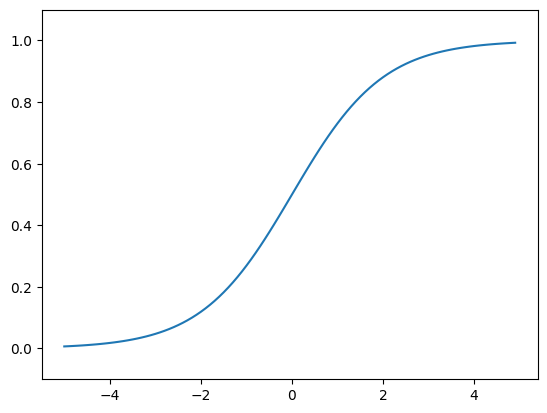

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교
시그모이드 함수와 계단 함수를 비교해보자. 이 두 함수를 [그림3-8]에 함께 그려보았다. 무엇이 다르고, 또 공통되는 성질이라 할 만한 것은 무엇일까?

#### [그림3-8] 계단 함수(점선)와 시그모이드 함수(실선)

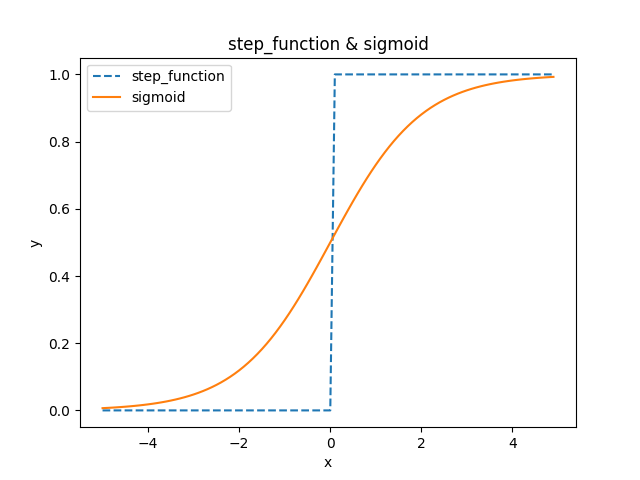

In [22]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-8.png")

[그림3-8]을 보고 가장 먼저 느껴지는 점은 '매끄러움'의 차이일 것이다. 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다. 한편, 계단 함수는 0을 경계로 출력이 갑자기 바뀌어 버린다. 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다.      

(역시 매끈함과 관련되지만) 계단 함수가 0과 1중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수(0.731..., 0.880... 등)를 돌려준다는 점도 다르다. 다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.     

두 함수의 공통점은 무엇일까? 두 함수는 매끄러움이라는 점에서는 다르지만, [그림3-8]을 큰 관점에서 보면 둘은 같은 모양을 하고 있다. 둘 다 입력이 작을 때의 출력은 0에 가깝고 (혹은 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는) 구조인 것이다. 즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다. 그리고 입력이 아무리 작거나 커도 출력은 0에서 1사이라는 것도 둘의 공통점이다.

### 3.2.6 비선형 함수
계단 함수와 시그모이드 함수의 공통점은 그 밖에도 있다. 중요한 공통점으로, 둘 모두는 $\scriptsize\textbf{비선형 함수}$이다. 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류된다.

$\textbf{NOTE}$     
> 활성화 함수를 설명할 때 비선형 함수와 선형 함수라는 용어가 자주 등장한다. 함수란 어떤 값을 입력하면 그에 따른 값을 돌려주는 '변환기'이다. 이 변환기에 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수를 $\scriptsize\textbf{선형 함수}$라고 한다. 수식으로는 $f(x)=ax+b$이고, 이때 $a$와 $b$는 상수이다. 그래서 선형 함수는 곧은 1개의 직선이 된다. 한편, $\scriptsize\textbf{비선형 함수}$는 문자 그대로 '선형이 아닌'함수이다. 즉, 직선 1개로는 그릴 수 없는 함수를 말한다. 

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 달리 말하면 선형 함수를 사용해서는 안 된다. 왜 선형 함수를 사용하면 안 될까? 그 이유는 바로 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.      

선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있다. 구체적으로 (약간 직관적으로) 설명해주는 간단한 예를 생각해보자. 선형 함수인 $h(x) = cx$를 활성화 함수로 사용한 3층 네트워크를 떠올려보자. 이를 식으로 나타내면 $y(x) = h(h(h(x)))$가 된다. 이 계산은 $y(x) = c \cdot c \cdot c \cdot x$처럼 곱셈을 세 번 수행하지만, 실은 $y(x) = ax$와 사실상 같은 식이다. $a=c^{3}$이라고만 하면 끝이다. 즉, 은닉층이 없는 네트워크로 표현할 수 있다. 이 예처럼 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다. 그래서 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

### 3.2.7 ReLU 함수
지금까지 활성화 함수로서 계단 함수와 시그모이드 함수를 소개했다. 시그모이드 함수는 신경망 분야에서 오래전부터 이용해왔으나, 최근에는 $\scriptsize\textbf{ReLU}^{\text{Rectified Linear Unit, 렐루}}$함수를 주로 이용한다.       

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수이다.     

수식으로는 식 (3.7)처럼 쓸 수 있다.
\begin{equation}
    h(x) = 
    \begin{cases}
        x~~~(x > 0) \\
        0~~~(x \leq 0)
    \end{cases}
\end{equation} \tag{3.7}

In [23]:
def relu(x):
    return np.maximum(0, x)

여기에서는 넘파이의 `maximum`함수를 사용하였다. `maximum`은 두 입력 중 큰 값을 선택해 반환하는 함수이다.        

이번 장에서는 앞으로 시그모이드 함수를 활성화 함수로 사용하겠지만, 이 책 후반부는 주로 ReLU 함수를 사용한다.

#### [그림3-9] ReLU 함수의 그래프

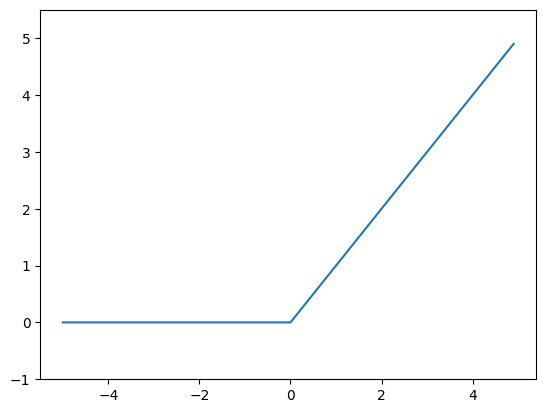

In [24]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

## 3.3 다차원 배열의 계산
넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다. 그래서 이번 절에서는 넘파이의 다차원 배열 계산에 대해서 설명한 뒤 신경망을 구현해보도록 한다.

### 3.3.1 다차원 배열
다차원 배열도 그 기본은 '숫자의 집합'이다. 숫자가 한 줄로 늘어선 것이나 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은 것이나 (더 일반화한) N차원으로 나열하는 것을 통틀어 다차원 배열이라고 한다. 그럼 넘파이를 사용해서 다차원 배열을 작성해보도록 하자. 우선은 지금까지 보아온 1차원 배열이다.

In [25]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


이와 같이 배열의 차원 수는 `np.ndim()`함수로 확인할 수 있다. 또, 배열의 형상은 인스턴스 변수인 `shape`으로 알 수 있다. 이 예에서 `A`는 1차원 배열이고 원소 4개로 구성되어 있다. 한 가지, `A.shape`가 튜플을 반환하는 것에 주의하자. 이는 1차원 배열이라도 다차원 배열일 때와 통일된 형태로 결과를 반환하기 위함이다. 예를 들어 2차원 배열일 때는 (4,3), 3차원 배열일 때는 (4,3,2) 같은 튜플을 반환한다. 그래서 1차원 배열일 때도 결과를 튜플로 반환하는 것이다. 이어서 2차원 배열을 작성해보자.

In [26]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


여기에서는 '$3\times 2$ 배열'인 `B`를 작성했다. $3\times 2$ 배열은 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개 있다는 의미이다. 이때 처음 차원은 0번째 차원, 다음 차원 1번째 차원에 대응한다. (파이썬의 인덱스는 0부터 시작한다는 걸 잊지 말자) 2차원 배열은 특히 $\scriptsize\textbf{행렬}^{\text{matrix}}$이라고 부르고 배열의 가로 방향을 $\scriptsize\textbf{행}^{\text{row}}$, 세로 방향을 $\scriptsize\textbf{열}^{\text{column}}$이라고 한다.

### 3.3.2 행렬의 곱
이어서 행렬(2차원 배열)의 곱을 구하는 방법을 알아보도록 하자. 예를 들어 $2 \times 2$행렬의 곱은 [그림3-10]처럼 계산한다.

#### [그림3-10] 행렬의 곱 계산 방법

\begin{equation*}
    \begin{bmatrix}
        1 & 2 \\
        3 & 4
    \end{bmatrix}
    \begin{bmatrix}
        5 & 6 \\
        7 & 8
    \end{bmatrix}
    =
    \begin{bmatrix}
        19 & 22 \\
        43 & 50
    \end{bmatrix}

\end{equation*}

그림에서처럼 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산한다. 그리고 그 계산 결과가 새로운 다차원 배열의 원소가 된다. 예를 들어 $\textbf{A}$의 1행과 $\textbf{B}$의 1열을 곱한 값은 결과 행렬의 1행 1번째 원소가 되고, $\textbf{A}$의 2행과 $\textbf{B}$의 1열을 곱한 결과는 2행 1번째 원소가 된다. 참고로 이 책에서는 '수식에서의 행렬'을 굵은 글씨로 표기한다.      

이 계산을 파이썬으로 구현하면 다음과 같다.

In [27]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

이 코드에서 `A`와 `B`는 $2 \times 2$행렬이며, 이 두 행렬의 곱은 넘파이 함수 `np.dot()`으로 계산한다. `np.dot()`은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다. 여기서 한 가지 주의할 것은 `np.dot(A,B)`와 `np.dot(B,A)`는 다른 값이 될 수 있다는 점이다. `+`와 `*`등의 일반적인 연산과 달리 행렬의 곱에서는 피연산자의 순서가 다르면 결과도 달라지게 된다.

In [28]:
print(A * B) # 원소 곱 (elementwise product)
print(np.dot(A, B)) # 행렬의 곱 (matrix product)
print(np.dot(B, A)) 

[[ 5 12]
 [21 32]]
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [29]:
A = np.array([[1,2,3] , [4,5,6]])
print(A.shape)
B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)
np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

$2 \times 3$행렬 `A`와 $3 \times 2$ 행렬 `B`의 곱은 이와 같이 구현할 수 있다. 이때 '$\scriptsize\text{행렬의 형상}^{\text{shape}}$'에 주의해야 한다. 구체적으로 말하면 행렬 `A`의 1번째 차원의 원소 수(열 수)와 행렬 `B`의 0번째 차원의 원소 수(행 수)가 같아야 한다. 앞의 예에서도 둘 모두 원소가 3개씩이었다. 이 값이 다르면 행렬의 곱을 계산할 수 없다. 실제로 $2 \times 3$행렬 `A`와 $2 \times 2$ 행렬 `C`를 곱하면 파이썬은 다음과 같은 오류를 출력하게 된다. 

In [30]:
C = np.array([[1,2], [3,4]])
print(C.shape)
print(A.shape)
np.dot(A, C)

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

이 오류는 행렬`A`의 1번째 차원(dim 1)과 행렬 `C`의 0번째 차원(dim 0)의 원소 수가 다르다고 말한다. 즉, 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다. 매우 중요한 내용이며, 앞으로 신경망을 학습시키는데 있어서 가장 민감하게 다뤄야 할 부분중 하나이니 반드시 기억하고 넘어가도록 한다.

In [31]:
A = np.array([[1,2], [3,4], [5,6]])
print(A.shape)
B = np.array([7,8])
print(B.shape)
np.dot(A, B)

(3, 2)
(2,)


array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱
그럼 이제 넘파이 행렬을 통해 신경망을 구현해보자. 이번 예에서는 [그림3-11]의 간단한 신경망을 가정해보자. 이 신경망은 편향과 활성화 함수를 생략하고 가중치만 갖는다.

#### [그림 3-11]

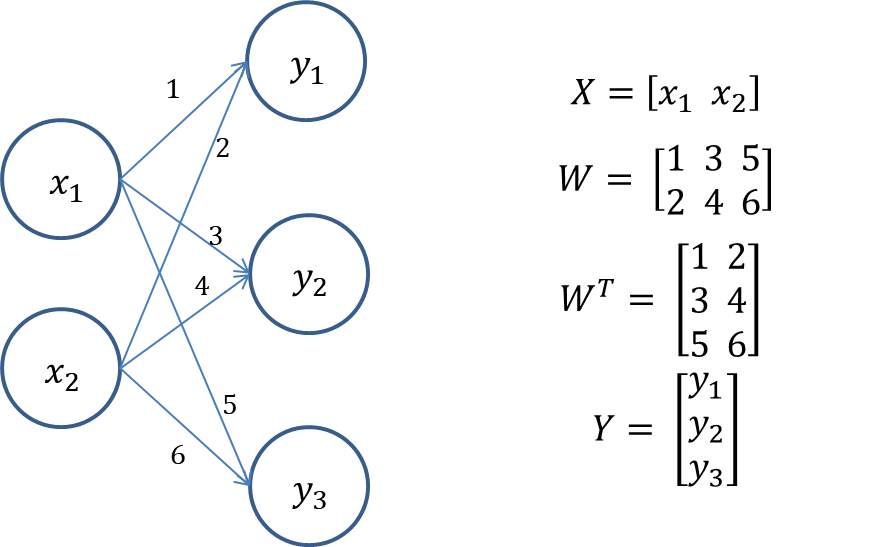

In [32]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-11.png")  

In [33]:
X = np.array([1, 2])
print(X)
print(X.shape)

[1 2]
(2,)


In [34]:
print(X.T)
print(X.T.shape)

[1 2]
(2,)


In [35]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [36]:
W.T

array([[1, 2],
       [3, 4],
       [5, 6]])

In [37]:
W.shape

(2, 3)

In [38]:
Y = np.dot(X, W)
print(Y)
print(Y.shape)

[ 5 11 17]
(3,)


In [39]:
Y = np.dot(W.T, X)
print(Y)
print(Y.shape)

[ 5 11 17]
(3,)


위 계산에서 자세히 보면 가중치행렬`W`와 `X`의 행렬곱과 가중치행렬의 전치행렬`W.T`와 `X`의 행렬곱의 결과는 같음을 알 수 있다. 즉 파이썬에서는, 그리고 넘파이에서는 특별한 언급이 없는 한 1차원 배열의 경우 행벡터나 열벡터가 아닌 그냥 벡터로 받아들이므로, 행렬곱 계산시에 대응되는 차원의 원소 수만 동일하면 올바른 계산이 가능한 것이다. 

정리하면, 다차원 배열의 스칼라곱을 구해주는 `np.dot`함수를 사용하면 이처럼 단번에 결과 `Y`를 계산할 수 있는 것이다. `Y`의 원소가 100개든 1,000개든 한 번의 연산으로 계산할 수 있다! 만약 `np.dot`을 사용하지 않으면 딥러닝 프레임워크를 활용하지 않는다는 가정하에, `Y`의 원소를 하나씩 따져보는 수밖에 없다.(또는 for 문을 사용해서 계산해야 하나, 이는 굉장히 번거롭다.) 그래서 행렬의 곱으로 한꺼번에 계산해주는 기능은 신경망을 구현할 때 매우 중요하다고 말할 수 있는 것이다.

## 3.4 3층 신경망 구현하기
이제 더 그럴싸한 신경망을 구현해보자. 이번에는 [그림3-12]의 3층 신경망에서 수행되는, 입력부터 출력까지의 처리($\scriptsize\textbf{순방향 처리}^{\text{Forward Propagation}}$)를 구현해보도록 한다. 이를 위해 앞에서 설명한 넘파이의 다차원 배열을 사용한다. 넘파이 배열을 잘만 쓰면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다.

#### [그림 3-12] 3층 신경망
입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

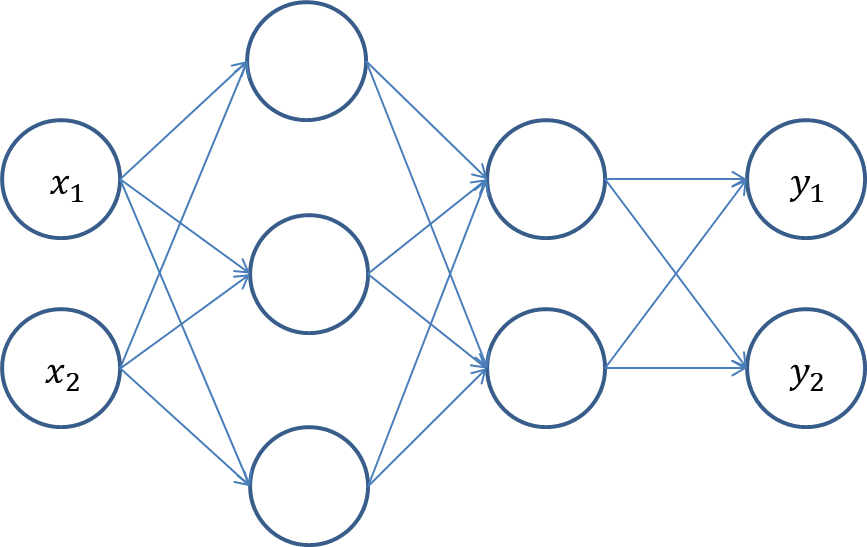

In [40]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-12.png")

### 3.4.1 표기법 설명
이번 절에서는 신경망에서의 처리를 설명하며 $w^{[1]}_{12}$와 $a^{[1]}_{1}$같은 표기법을 소개한다. 조금 복잡해 보일 수 있지만, 별 거 없으니 걱정말자.

$\textbf{WARNING}$     
> 이번 절의 핵심은 신경망에서의 계산을 행렬 계산으로 정리할 수 있다는 것이다. 신경망 각 층의 계산은 행렬의 곱으로 처리할 수(더 큰 관점에서 생각할 수)있으니, 세세한 표기 규칙은 잊어버려도 앞으로의 설명을 이해하는 데 전혀 지장이 없다.

그럼 하나씩 정의해보자. [그림3-13]을 보자. [그림 3-13]은 입력층의 뉴런 $x_2$에서 다음 층의 뉴런 $a^{[1]}_{1}$으로 향하는 선 위에 가중치를 표시하고 있다.

#### [그림3-13] 중요한 표기

[그림3-13]과 같이 가중치와 은닉층 뉴런의 오른쪽 위에는 $^{[1]}$이 붙어 있다. 이는 1층의 가중치, 1층의 뉴런임을 뜻하는 번호이다. 또, 가중치의 오른쪽 아래의 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호이다. 가령 $w^{[1]}_{12}$은 앞 층의 2번째 뉴런$(x_2)$에서 다음 층의 1번째 뉴런$(a^{[1]}_{1})$으로 향할 때의 가중치라는 뜻이다. 가중치 오른쪽 아래의 인덱스 번호는 '다음 층 번호, 앞 층 번호'순으로 적는다.

### 3.4.2 각 층의 신호 전달 구현하기
이번 절에서는 입력층에서 '1층의 첫 번째 뉴런'으로 가는 신호를 살펴보도록 한다. 앞선 표기를 그대로 유지한채, $a^{[1]}_{1}$을 수식으로 나타내보자. $a^{[1]}_{1}$은 가중치를 곱한 신호 두 개와 편향을 합해서 다음과 같이 계산한다.
\begin{equation}
    a^{[1]}_1 = w^{[1]}_{11} x_{1} + w^{[1]}_{12} x_{2} + b^{[1]}_{1}
\end{equation} \tag{3.8}

여기에서 행렬의 곱을 이용하면 1층의 '가중치 부분'을 다음 식처럼 간소화 가능하다.

\begin{equation}
    \mathbf{A}^{[1]} = \mathbf{W}^{[1]\top} \mathbf{X} + \mathbf{b}^{[1]}
\end{equation} \tag{3.9}

> $\textbf{수정}$ 여기에서 행렬의 곱을 이용하면 1층의 '가중치 부분'을 다음 식처럼 간소화 가능하다.

> \begin{equation}
    \mathbf{A}^{[1]} =  \mathbf{X} \mathbf{W}^{[1]} + \mathbf{b}^{[1]}
\end{equation} \tag{3.9}

이때 $\mathbf{A}^{[1]}, \mathbf{W}^{[1]}, \mathbf{W}^{[1]\top}, \mathbf{X}, \mathbf{b}^{[1]}$은 다음과 같다.

\begin{equation*}
    \mathbf{A}^{[1]} =
    \begin{bmatrix}
        a^{[1]}_1 \\
        a^{[1]}_2 \\
        a^{[1]}_3 
    \end{bmatrix},
    ~~
    \mathbf{X} =
    \begin{bmatrix}
        x_1 \\
        x_2
    \end{bmatrix},
    ~~
    \mathbf{b}^{[1]} =
    \begin{bmatrix}
        b^{[1]}_1 \\
        b^{[1]}_2 \\
        b^{[1]}_3
    \end{bmatrix}
\end{equation*}

\begin{equation*}
    \mathbf{W}^{[1]} =
    \begin{bmatrix}
        w^{[1]}_{11} & w^{[1]}_{21} & w^{[1]}_{31} \\
        w^{[1]}_{12} & w^{[1]}_{22} & w^{[1]}_{32}
    \end{bmatrix},
    ~~
    \mathbf{W}^{[1]\top} =
    \begin{bmatrix}
        w^{[1]}_{11} & w^{[1]}_{12} \\
        w^{[1]}_{21} & w^{[1]}_{22} \\
        w^{[1]}_{31} & w^{[1]}_{32}
    \end{bmatrix} 
\end{equation*}

> $\textbf{수정}$
이때 $\mathbf{A}^{[1]}, \mathbf{W}^{[1]}, \mathbf{W}^{[1]\top}, \mathbf{X}, \mathbf{b}^{[1]}$은 다음과 같다.

> \begin{equation*}
    \mathbf{A}^{[1]} =
    \begin{bmatrix}
        a^{[1]}_1 & a^{[1]}_2 & a^{[1]}_3         
    \end{bmatrix},
    ~~
    \mathbf{X} =
    \begin{bmatrix}
        x_1 & x_2
    \end{bmatrix},
    ~~
    \mathbf{b}^{[1]} =
    \begin{bmatrix}
        b^{[1]}_1 & b^{[1]}_2 & b^{[1]}_3
    \end{bmatrix}
\end{equation*}

> \begin{equation*}
    \mathbf{W}^{[1]} =
    \begin{bmatrix}
        w^{[1]}_{11} & w^{[1]}_{21} & w^{[1]}_{31} \\
        w^{[1]}_{12} & w^{[1]}_{22} & w^{[1]}_{32}
    \end{bmatrix}
\end{equation*}

그럼 이제 넘파이의 다차원 배열을 이용하여 식 (3.9)를 구현해보자.(입력 신호, 가중치, 편향은 적당한 값으로 설정하도록 하자.)

In [2]:
import numpy as np

In [4]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(W1.T, X) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [7]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
# B1 = np.array([0.1, 0.2, 0.3])
B1 = np.array([0.1]) ### 파이썬 브로드캐스트 기능으로 인해 가능한 방식

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(1,)
[0.3 0.6 0.9]


이어서 1층의 활성화 함수에서의 처리를 살펴보자. 은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 $a$로 표기하고 활성화 함수 $h()$로 변환된 신호를 $z$로 표기한다. 여기에서는 활성화 함수로 시그모이드 함수를 사용하기로 한다. 이를 파이썬으로 구현하면 다음과 같다.

In [42]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


이 `sigmoid()`함수는 앞에서 정의한 함수이다. 이 함수는 넘파이 배열을 받아 같은 수의 원소로 구성된 넘파이 배열을 반환한다.
이어서 1층에서 2층으로 가는 과정을 수식으로 한 번 살펴보고 이를 구현해보자.     

그리고 지금부터 편의상 sigmoid함수의 표기는 $\sigma(\cdot)$으로 하겠다.

이번에는 $a^{[2]}_{1}$을 수식으로 나타내보자. $a^{[2]}_{1}$은 앞서 구한 $z^{[1]}_{i} = \sigma(a^{[1]}_{i}),~i=1,2,3$을 입력 신호로 받으며, 이 입력 신호들에 가중치를 곱한다음 편향을 합해서 다음과 같이 계산한다.
\begin{equation*}
    a^{[2]}_1 = w^{[2]}_{11} z^{[1]}_{1} + w^{[2]}_{12} z^{[1]}_{2} + w^{[2]}_{13} z^{[1]}_{3} + b^{[2]}_{1}
\end{equation*}

여기에서 행렬의 곱을 이용하면 2층의 '가중치 부분'을 다음 식처럼 간소화 가능하다.

\begin{equation*}
    \mathbf{A}^{[2]} = \mathbf{W}^{[2]\top} \mathbf{Z}^{[1]} + \mathbf{b}^{[2]}
\end{equation*}

> $\textbf{수정}$ 여기에서 행렬의 곱을 이용하면 2층의 '가중치 부분'을 다음 식처럼 간소화 가능하다.

> \begin{equation*}
    \mathbf{A}^{[2]} = \mathbf{Z}^{[1]} \mathbf{W}^{[2]}  + \mathbf{b}^{[2]}
\end{equation*}

이때 $\mathbf{A}^{[2]}, \mathbf{W}^{[2]}, \mathbf{W}^{[2]\top}, \mathbf{A}^{[1]}, \mathbf{b}^{[2]}$은 다음과 같다.

\begin{equation*}
    \mathbf{Z}^{[1]} =
    \begin{bmatrix}
        z^{[1]}_1 \\
        z^{[1]}_2 \\
        z^{[1]}_3 
    \end{bmatrix},
    ~~
    \mathbf{A}^{[2]} =
    \begin{bmatrix}
        a^{[2]}_1 \\
        a^{[2]}_2 
    \end{bmatrix},
    ~~
    \mathbf{b}^{[2]} =
    \begin{bmatrix}
        b^{[2]}_1 \\
        b^{[2]}_2 
    \end{bmatrix}
\end{equation*}

\begin{equation*}
    \mathbf{W}^{[2]} =
    \begin{bmatrix}
        w^{[2]}_{11} & w^{[2]}_{21} \\
        w^{[2]}_{12} & w^{[2]}_{22} \\
        w^{[2]}_{13} & w^{[2]}_{23}
    \end{bmatrix},
    ~~
    \mathbf{W}^{[2]\top} =
    \begin{bmatrix}
        w^{[2]}_{11} & w^{[2]}_{12} & w^{[2]}_{13} \\
        w^{[2]}_{21} & w^{[2]}_{22} & w^{[2]}_{23}
    \end{bmatrix} 
\end{equation*}

> $\textbf{수정}$ 이때 $\mathbf{A}^{[2]}, \mathbf{W}^{[2]}, \mathbf{W}^{[2]\top}, \mathbf{A}^{[1]}, \mathbf{b}^{[2]}$은 다음과 같다.

> \begin{equation*}
    \mathbf{Z}^{[1]} =
    \begin{bmatrix}
        z^{[1]}_1 & z^{[1]}_2 & z^{[1]}_3
    \end{bmatrix},
    ~~
    \mathbf{A}^{[2]} =
    \begin{bmatrix}
        a^{[2]}_1 & a^{[2]}_2 
    \end{bmatrix},
    ~~
    \mathbf{b}^{[2]} =
    \begin{bmatrix}
        b^{[2]}_1 & b^{[2]}_2         
    \end{bmatrix}
\end{equation*}

> \begin{equation*}
    \mathbf{W}^{[2]} =
    \begin{bmatrix}
        w^{[2]}_{11} & w^{[2]}_{21} \\
        w^{[2]}_{12} & w^{[2]}_{22} \\
        w^{[2]}_{13} & w^{[2]}_{23}
    \end{bmatrix}
\end{equation*}

In [43]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)

A2 = np.dot(W2.T, Z1) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)


(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


이 구현은 1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하면 조금 전의 구현과 사실상 같다. 이처럼 넘파이 배열을 사용하면서 층 사이의 신호 전달을 쉽게 구현할 수 있다.        

마지막으로 2층에서 출력층으로의 신호 전달이다. 출력층의 구현도 그동안의 구현과 거의 같다. 딱 하나, 활성화 함수만 지금까지의 은닉층과 다르다.

여기에서 행렬의 곱을 이용하면 2층의 '가중치 부분'을 다음 식처럼 간소화 가능하다.

\begin{equation*}
    \mathbf{A}^{[3]} = \mathbf{W}^{[3]\top} \mathbf{Z}^{[2]} + \mathbf{b}^{[3]}
\end{equation*}

> $\textbf{수정}$ 여기에서 행렬의 곱을 이용하면 2층의 '가중치 부분'을 다음 식처럼 간소화 가능하다.

\begin{equation*}
    \mathbf{A}^{[3]} = \mathbf{Z}^{[2]} \mathbf{W}^{[3]}  + \mathbf{b}^{[3]}
\end{equation*}

이때 $\mathbf{A}^{[3]}, \mathbf{W}^{[3]}, \mathbf{W}^{[3]\top}, \mathbf{A}^{[2]}, \mathbf{b}^{[3]}$은 다음과 같다.

\begin{equation*}
    \mathbf{Z}^{[2]} =
    \begin{bmatrix}
        z^{[2]}_1 \\
        z^{[2]}_2
    \end{bmatrix},
    ~~
    \mathbf{A}^{[3]} =
    \begin{bmatrix}
        a^{[3]}_1 \\
        a^{[3]}_2 
    \end{bmatrix},
    ~~
    \mathbf{b}^{[3]} =
    \begin{bmatrix}
        b^{[3]}_1 \\
        b^{[3]}_2 
    \end{bmatrix}
\end{equation*}

\begin{equation*}
    \mathbf{W}^{[3]} =
    \begin{bmatrix}
        w^{[3]}_{11} & w^{[3]}_{21} \\
        w^{[3]}_{12} & w^{[3]}_{22}
    \end{bmatrix},
    ~~
    \mathbf{W}^{[3]\top} =
    \begin{bmatrix}
        w^{[3]}_{11} & w^{[3]}_{12} \\
        w^{[3]}_{21} & w^{[3]}_{22}
    \end{bmatrix} 
\end{equation*}

> $\textbf{수정}$ 이때 $\mathbf{A}^{[3]}, \mathbf{W}^{[3]}, \mathbf{W}^{[3]\top}, \mathbf{A}^{[2]}, \mathbf{b}^{[3]}$은 다음과 같다.

> \begin{equation*}
    \mathbf{Z}^{[2]} =
    \begin{bmatrix}
        z^{[2]}_1 & z^{[2]}_2        
    \end{bmatrix},
    ~~
    \mathbf{A}^{[3]} =
    \begin{bmatrix}
        a^{[3]}_1 & a^{[3]}_2         
    \end{bmatrix},
    ~~
    \mathbf{b}^{[3]} =
    \begin{bmatrix}
        b^{[3]}_1 & b^{[3]}_2         
    \end{bmatrix}
\end{equation*}

> \begin{equation*}
    \mathbf{W}^{[3]} =
    \begin{bmatrix}
        w^{[3]}_{11} & w^{[3]}_{21} \\
        w^{[3]}_{12} & w^{[3]}_{22}
    \end{bmatrix}
\end{equation*}

In [44]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(W3.T, Z2) + B3
Y = identity_function(A3)   # 혹은 Y = A3

여기에서는 항등 함수인 `identity_function()`을 정의하고, 이를 출력층의 활성화 함수로 이용했다. 항등 함수는 입력을 그대로 출력하는 함수이다. 그래서 이 예에서는 `identity_function()`을 굳이 정의할 필요는 없지만, 그동안의 흐름과 통일하기 위해 이렇게 구현했다.

$\textbf{NOTE}$   
> 출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다. 예를 들어 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다. 출력층의 활성화 함수에 대해서는 다음에 다시 자세히 알아보도록 하자.

### 3.4.3 구현 정리
이로써 3층 신경망에 대한 설명은 끝이다. 그럼 지금까지의 구현을 정리해보도록 하자. 신경망 구현의 관례에 따라 가중치만 W1과 같이 대문자로 쓰고, 그 외 편향과 중간 결과 등은 모두 소문자로 썼다.

In [45]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(W1.T, x) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(W2.T, z1) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(W3.T, z2) + b3
    y = identity_function(a3)

    return y

In [46]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)    # [ 0.31682708  0.69627909]

[0.31682708 0.69627909]


여기에서는 `init_network()`와 `forward()`라는 함수를 정의했다. `init_network()`함수는 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 `network`에 저장한다. 이 딕셔너리 변수 `network`에는 각 층에 필요한 매개변수(가중치와 편향)를 저장한다. 그리고 `forward()`함수는 입력 신호를 출력으로 변환하는 처리 과정을 모두 구현하고 있다.      

함수 이름을 `forward`라 한 것은 신호가 순방향(입력에서 출력 방향)으로 전달됨$(\scriptsize\textbf{순전파}^{\text{Forward Propagation}})$을 알리기 위함이다. 앞으로 신경망 학습을 다룰 때 역방향(backward, 출력에서 입력 방향)처리에 대해서도 살펴볼 것이다.

이로써 신경망의 순방향 구현은 끝났다. 보다시피 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현 가능하다!

## 3.5 출력층 설계하기
신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

$\textbf{NOTE}$        
> 기계학습 문제는 $\scriptsize\textbf{분류}^{\text{classification}}$와 $\scriptsize\textbf{회귀}^{\text{regression}}$로 나뉜다. 분류는 데이터가 어느 $\scriptsize\text{클래스}^{\text{class}}$에 속하느냐는 문제이다. 사진 속 인물의 성별을 분류하는 문제가 여기에 속한다. 한편, 회귀는 입력 데이터에서 (연속적인) 수치를 예측하는 문제이다. 사진 속 인물의 몸무게를 예측하는 문제가 회귀문제이다.

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
$\scriptsize\textbf{항등 함수}^{\text{identity function}}$ 는 입력을 그대로 출력한다. 입력과 출력이 항상 같다는 뜻의 항등이다. 그래서 출력층에서 항등 함수를 사용하면 입력 신호가 그대로 출력 신호가 된다.      

한편, 분류에서 사용하는 $\scriptsize\textbf{소프트맥스 함수}^{\text{softmax function}}$의 식은 다음과 같다.
\begin{equation*}
    y_{k} = \cfrac{\exp (a_k)}{ \displaystyle\sum_{i=1}^{n} \exp(a_i)}
\end{equation*} \tag{3.10}

$\exp(x)$ 는 $e^{x}$을 뜻하는 $\scriptsize\text{지수 함수}^{\text{exponential function}}$이다.$(e\text{는 자연상수})$ $n$은 출력층의 뉴런 수, $y_k$는 그 중 $k$번째 출력임을 뜻한다. 식 (3.10)과 같이 소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다. 식 (3.10)의 분모에서 알 수 있듯이, 소프트맥스 함수값은 모든 입력 신호에서 영향을 받는다.

그럼, 이상의 소프트맥스 함수를 구현해보자.

In [47]:
import numpy as np
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


이제 이 논리 흐름을 파이썬 함수로 정의하여, 앞으로 필요할 때 사용할 수 있도록 해보자

In [48]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점
앞 절에서 구현한 `softmax()`함수의 코드는 식 (3.10)을 제대로 표현하고 있지만, 컴퓨터로 계산할 때는 결함이 있다. 바로 오버플로 문제이다. 소프트맥스 함수는 지수 함수를 사용하는데, 지수 함수란 것은 쉽게 아주 큰 값을 내뱉는다. 가령 $e^{10}$은 20,000이 넘고, $e^{100}$은 0이 40개 넘는 큰 값이 되며, $e^{1000}$은 무한대를 뜻하는 inf가 되어 돌아온다. 그리고 이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해진다.

$\textbf{WARNING}$      
> 컴퓨터는 $\scriptsize\text{수}^{\text{number}}$를 4바이트나 8바이트와 같이 크기가 유한한 데이터로 다룬다. 다시 말해 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없다는 문제가 발생한다. 이것을 $\scriptsize\text{오버플로}^{\text{overflow}}$라 하며, 컴퓨터로 수치를 계산할 때 주의할 점중 하나이다.

이 문제를 해결하도록 소프트맥스 함수 구현을 개선해보자. 다음은 개선한 수식이다.

\begin{align*}
    y_k = \cfrac{\exp(a_k)}{\displaystyle\sum_{i=1}^{n}\exp(a_i)}
        & = \cfrac{C\exp(a_k)}{C\displaystyle\sum_{i=1}^{n}\exp(a_i)} \\
        & = \cfrac{\exp(a_k + \log C)}{\displaystyle\sum_{i=1}^{n}\exp(a_i + \log C)} \\
        & = \cfrac{\exp(a_k + C')}{\displaystyle\sum_{i=1}^{n}\exp(a_i + C')}

\end{align*} \tag{3.11}

식 (3.11)의 전개 과정을 살펴보자. 첫 번째 변형에서는 $C$라는 임의의 정수를 분자와 분모 양쪽에 곱했다.(양쪽에 같은 수를 곱했으니 결국 똑같은 계산이다.) 그 다음으로 $C$를 지수함수 $\exp(\cdot)$ 안으로 옮겨 $\log C$로 만든다. 마지막으로 $\log C$를 $C'$이라는 새로운 기호로 바꾼다.       

식 (3.11)이 말하는 것은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도(혹은 빼도) 결과는 바뀌지 않는다는 것이다. 여기서 $C'$에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다. 구체적인 예를 한 번 보도록 하자.

In [49]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))   # 소프트맥스 함수의 계산


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7732\1991490945.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))   # 소프트맥스 함수의 계산
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_7732\1991490945.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))   # 소프트맥스 함수의 계산


array([nan, nan, nan])

In [50]:
c = np.max(a)   # c = 1010 (최댓값)
a - c

array([  0, -10, -20])

In [51]:
np.exp(a - c) / np.sum(np.exp(a - c))   # 오버플로우를 막은 소프트맥스 함수

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

이 예에서 보는 것처럼 아무런 조치 없이 그냥 계산하면 `nan`이 출력된다. (nan은 not a number의 약자이다) 하지만 입력 신호 중 최댓값(이 예에서는 c)을 빼주면 올바르게 계산할 수 있다. 이를 바탕으로 소프트맥스 함수를 다시 구현하면 다음과 같다.

In [52]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로우 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징
`softmax()`함수를 사용하면 신경망의 출력은 다음과 같이 계산할 수 있다.

In [53]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

보는 바와 같이 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이다. 또, 소프트맥스 함수 출력의 총합은 1이다. 출력 총합이 1이 된다는 점은 소프트맥스 함수의 중요한 성질이다. 이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.     

가령 앞의 예에서 `y[0]`의 확률은 0.018(1.8%), `y[1]`의 확률은 0.245(24.5%), `y[2]`의 확률은 0.737(73.7%)로 해석할 수 있다. 그리고 이 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다"라고 할 수 있다. 혹은 "74%의 확률로 2번째 클래스, 25%의 확률로 1번째 클래스, 1%의 확률로 0번째 클래스다"와 같이 확률적인 결론도 낼 수 있다. 즉, 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 되는 것이다.       

여기서 주의점으로, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다는 것이다. 이는 지수 함수 $y=\exp(x)$가 단조 증가 함수이기 때문이다. 실제로 앞의 예에서는 $a$의 원소들 사이의 대소 관계가 `y`의 원소들 사이의 대소 관계로 그대로 이어진다. 예를 들어 $a$에서 가장 큰 원소는 2번째 원소이고, `y`에서 가장 큰 원소도 2번째 원소이다.     

신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다. 결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다. 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다.       

$\textbf{NOTE}$     

> 기계학습의 문제 풀이는 $\scriptsize\textbf{학습}$과 $\scriptsize\textbf{추론}^{\text{inference}}$의 두 단계를 거쳐 이뤄진다. 학습 단계에서 모델을 학습하고(직업 훈련을 받고), 추론 단계에서 앞서 학습한 모델로 미지의 데이터에 대해서 추론(분류)을 수행한다.(현장에 나가 진짜 일을 한다) 방금 설명한 대로, 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이다. 한편, 신경망을 학습시킬 때는 출력층에서 소프트맥스 함수를 사용한다.(4장 참고)



### 3.5.4 출력층의 뉴런 수 정하기
출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다. 분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다. 예를 들어 입력 이미지를 숫자 0부터 9중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정하게 된다.      

출력층 뉴런은 위에서부터 차례로 숫자 $0,1,...,9$에 대응하며, 이 10개의 뉴런 중 가장 큰 출력 값을 가지는 뉴런에 해당하는 숫자로 신경망은 숫자를 분류하게 된다.

## 3.6 손글씨 숫자 인식
신경망의 구조를 배웠으니 실전 예에 적용해보자. 바로 손글씨 숫자 분류이다. 이번 절에서는 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현할 것이다. 이 추론 과정을 신경망의 $\scriptsize \textbf{순전파}^{\text{forward propagation}}$라고도 한다.

$\textbf{NOTE}$
> 기계학습과 마찬가지로 신경망도 두 단계를 거쳐 문제를 해결한다. 먼저 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수를 학습하고, 추론 단계에서는 앞서 학습한 매개변수를 사용하여 입력 데이터를 분류한다.

### 3.6.1 MNIST 데이터셋
이번 예에서 사용하는 데이터셋은 MNIST라는 손글씨 숫자 이미지 집합이다. MNIST는 기계학습 분야에서 아주 유명한 데이터셋으로, 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용하고 있다. 이미지 인식이나 기계학습 논문들을 읽다 보면 실험용 데이터로 자주 등장하는 것을 확인할 수 있을 것이다.        

MNIST 데이터셋은 0부터 9까지의 숫자 이미지로 구성된다(그림 3-13). 훈련 이미지가 60,000장, 시험 이미지가 10,000장 준비되어 있다. 일반적으로 이 훈련 이미지들을 사용하여 모델을 학습하고, 학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지 평가한다.

#### [그림3-13] MNIST 이미지 데이터셋의 예

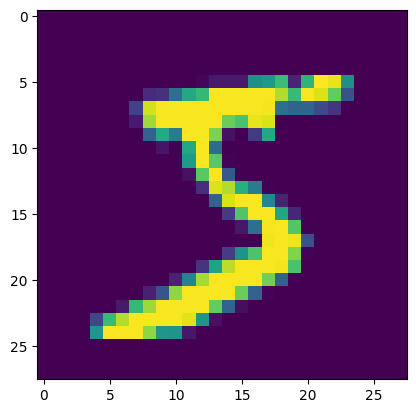

In [54]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\images\\fig 3-13.png")

MNIST의 이미지 데이터는 $28 \times 28$ 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지의 값을 취한다. 각 이미지에는 또한 '7', '2', '1'과 같이 그 이미지가 실제 의미하는 숫자가 레이블로 붙어 있다.     

이 책에서는 MNIST 데이터셋을 내려받아 이미지를 넘파이 배열로 변환해주는 파이썬 스크립트를 제공한다.(깃허브 저장소의 dataset/mnist.py 파일) mnist.py를 임포트해 사용하려면 작업 디렉터리를 ch01, ch02, ..., ch08 중 하나로 옮겨야 한다.(이유는 다음 페이지에서 설명한다) mnist.py 파일에 정의된 `load_mnist()`함수를 이용하면 MNIST 데이터를 다음과 같이 아주 쉽게 가져올 수 있다.

In [55]:
pwd()

'c:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장'

$\textbf{SELF NOTE}$        
> dataset이라는 경로상에 mnist.py파일이 있어야 
```python
from dataset.mnist import load_mnist
```
> 가 정상적으로 실행된다. 또한
```python
sys.path.append(os.pardir)
```
> 을 여러번 실행하면 경로가 계속 추가되기에 경로 중복 문제가 발생하여 
```python
from dataset.mnist import load_mnist
```
> 가 올바르게 실행되지 못한다.        

> 그러므로 다음을 기억하자.
> 1. 올바른 경로상에 python파일 설치하기
> 2. `sys.path.append`는 한번만 실행. 만약 실수로 여러번 실행했다면 커널 재시작하기

In [56]:
import sys, os
# sys.path.append("c:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1") # 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


다음은 MNIST 이미지 데이터셋의 일부를 `img_show()`함수를 통해 시각화하는 과정이다.

<class 'numpy.ndarray'>
5
(784,)
(28, 28)


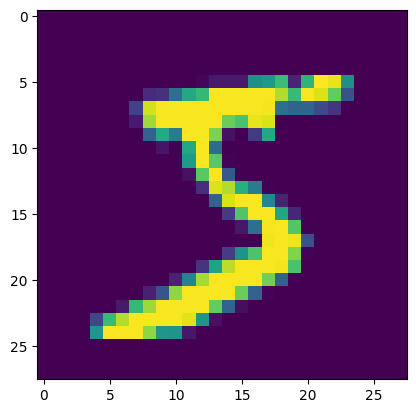

In [57]:
import sys, os
import numpy as np
from matplotlib import pyplot as plt
# sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환
    #pil_img.show()
    plt.imshow(np.array(pil_img))
    plt.show()
    
img = x_train[0]
label = t_train[0]

print(type(img)) # <class 'numpy.ndarray'>
print(label) # 5

print(img.shape)          # (784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)          # (28, 28)

img_show(img)

이어서, 코드를 보면 가장 먼저 부모 디렉터리의 파일을 가져올 수 있도록 설정하고 dataset/mnist.py의 `load_mnist`함수를 임포트하는 것을 알 수 있다. 그런 다음 `load_mnist`함수로 MNIST 데이터셋을 읽는다. `load_mnist`가 MNIST 데이터를 받아와야 하니 최초 실행 시에는 인터넷에 연결된 상태여야 한다. 두 번째부터는 로컬에 저장된 파일(pickle 파일)을 읽기 때문에 순식간에 끝난다.

$\textbf{SELF NOTE}$
> `load_mnist`로 MNIST 데이터를 받아올 때, 최초 실행 시에는 얀 르쿤의 사이트로 접속해서 데이터를 다운로드받고 이를 pickle 파일로 변환하는 과정을 거치게 된다. 그러나 모종의 이유로 르쿤의 사이트는 현재 비밀번호가 설정되어있고, 이에 따라 데이터셋을 따로 다운로드 받아 .../dataset 디렉터리의 하위파일로 넣었다.

$\textbf{WARNING}$  
> mnist.py 파일은 이 책 예제 소스의 dataset 디렉터리에 있고, 이 파일을 이용하는 다른 예제들은 각각 ch01, ch02, ch03, ..., ch08 디렉터리에서만 수행한다고 가정하자. 즉, 각 예제에서 mnist.py 파일을 찾으려면 부모 디렉터리로부터 시작해야 해서 `sys.path.append(os.pardir)` 코드를 추가한 것이다.

`load_mnist` 함수는 읽은 MNIST 데이터를 "$(\scriptsize\textbf{훈련 이미지}, \scriptsize\textbf{훈련 레이블})$, $(\scriptsize\textbf{시험 이미지}, \scriptsize\textbf{시험 레이블})$" 형식으로 반환한다. 인수로는 `normalize`, `flatten`, `one_hot_label` 세 가지를 설정할 수 있다. 세 인수 모두 `boolean`값이다.
             
 첫 번째 인수인 `normalize`는 입력 이미지의 픽셀값을 0.0~1.0 사이의 값으로 정규화할지를 정한다. `False`로 설정하면 입력 이미지의 픽셀은 원래 값 그대로 0~255 사이의 값을 유지한다.      
 
 두 번째 인수인 `flatten`은 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정한다. `False`로 설정하면 입력 이미지를 $1 \times 28 \times 28$의 3차원 배열로, `True`로 설정하면 784개의 원소로 이루어진 1차원 배열로 저장한다.      
 
 세 번째 인수인 `one_hot_label`은 레이블을 $\scriptsize\textbf{원-핫 인코딩}^{\text{one-hot encoding}}$형태로 저장할지를 정한다. 원-핫 인코딩이란, 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 정답을 뜻하는 원소만 1이고(hot 하고) 나머지는 모두 0인 배열을 뜻한다. `one_hot_label`이 `False`면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고, `True`일 때는 레이블을 원-핫 인코딩하여 저장한다.

$\textbf{NOTE}$  
> 파이썬에는 $\scriptsize\text{pickle}^{\text{피클}}$이라는 편리한 기능이 있다. 이는 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능이다. 저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있다. MNIST 데이터셋을 읽는 `load_mnist()` 함수에서도 (2번째 이후의 읽기 시) pickle을 이용한다. pickle 덕분에 MNIST 데이터를 순식간에 준비할 수 있는 것이다.

$\textbf{SELF NOTE}$        
> `flatten`의  경우 `False`로 설정하게 되면 입력 이미지를 $1 \times 28 \times 28$ 크기의 3차원 배열로 바꾸게 되는데, 이때 1이 의미하는건 $\scriptsize \text{배치 사이즈}^{\text{batch size}}$이다. 우선은 넘어가고 이에 대해서는 나중에 다시 다뤄보록 하자.         

> pickle은 신경망을 훈련시켜서 얻은 학습된 가중치값들을 저장하는데 매우 유용하다. 이 기능덕분에 신경망의 재학습없이도 학습된 가중치를 그대로 사용가능하며 로딩시간 또한 매우 빠르다. 모델 학습 외에도 다양한 경우에 사용 가능한 매우 유용한 기능이니 잘 기억해두자.

### 3.6.2 신경망의 추론 처리
드이어 이 MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현할 차례이다. 이 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다. 입력층 뉴런이 784개인 이유는 이미지 크기가 $28 \times 28 = 784$이기 때문이고, 출력층 뉴런이 10개인 이유는 이 문제가 0에서 9까지의 숫자를 구분하는 문제이기 때문이다. 한편, 은닉층은 총 두 개로, 첫 번째 은닉층에는 50개의 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치할 것이다. 여기서 50과 100은 임의로 정한 값이다.        

이제 순서대로 작업을 처리해줄 세 함수인 `get_data()`, `init_network()`, `predict()`를 정의하자.(ch03/neuralnet_mnist.py)

In [89]:
from dataset.mnist import load_mnist
import pickle
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("c:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # print(f"x.shape : {x.shape}")
    # print(f"W1.shape : {W1.shape}")
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

`init_network()`에서는 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다. 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.      

나머지 두 함수는 지금까지 보아온 구현과 거의 같으니 설명은 생략한다. 그럼 이 세 함수를 사용해 신경망에 의한 추론을 수행해보고, $\scriptsize \textbf{정확도}^{\text{accuracy}}$(분류가 얼마나 올바른가)도 평가해보자.

In [90]:
x, t = get_data()
network = init_network()

print(x.shape) # (10000, 784)
print(t.shape) # (10000,)

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    # if i % 1000 == 0:
    #     print(y)
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

(10000, 784)
(10000,)
Accuracy:0.9352


In [60]:
pwd()

'c:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장'

In [84]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import pickle
from dataset.mnist_modified import load_mnist_modified
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist_modified(flatten=True, normalize="Standardization", one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("c:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


가장 먼저 MNIST 데이터셋을 얻고 네트워크를 생성한다. 이어서 for 문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 `predict()`함수로 분류한다. `predict()`함수는 각 레이블의 확률을 넘파이 배열로 반환한다. 예를 들어 [0.1, 0.3, 0.2, ..., 0.04] 같은 배열이 반환되며, 이는 이미지가 숫자 '0'일 확률이 0.1, '1'일 확률이 0.3, ...식으로 해석한다. 그런 다음 `np.argmax()`함수로 이 배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스를 구한다. 이것이 바로 예측 결과이다. 마지막으로, 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(`accuracy_cnt`)를 세고, 이를 전체 이미지 숫자로 나눠 정확도를 구한다.        

이 코드를 실행하면 "Accuracy:0.9352"가 출력된다. 올바르게 분류한 비율이 93.52%라는 뜻이다. 이번 장의 목표는 학습된 신경망을 돌려보는 것까지라 정확도에 대해서는 고민하지 않겠으나, 한 가지만 미리 언급하겠다. 다음 장부터는 신경망 구조와 학습 방법을 궁리함으로써 이 정확도를 더 높여갈 것이다. 마지막에는 99% 이상까지 도달할 예정이다!       

또한, 이 예에서는 `load_mnist()`함수의 인수인 `normalize`를 `True`로 설정하였다. `normalize`를 `True`로 설정하면 0~255 범위인 각 픽셀의 값을 0.0~1.0 범위로 변환한다.(단순히 픽셀의 값을 255로 나눈다) 이처럼 데이터를 특정 범위로 변환하는 처리를 $\scriptsize \textbf{정규화}^{\text{normalization}}$라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 $\scriptsize \textbf{전처리}^{\text{pre-processing}}$라 한다. 여기에서는 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행한 셈이다.

$\textbf{NOTE}$  
> 현업에서도 신경망(딥러닝)에 전처리를 활발히 사용한다. 전처리를 통해 식별 능력을 개선하고 학습 속도를 높이는 등의 사례가 많이 제시되고 있다. 앞의 예에서는 각 픽셀의 값을 255로 나누는 단순한 정규화를 수행했지만, 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많다. 예를 들어 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동하거나 데이터의 확산 범위를 제한하는 정규화를 수행한다. 그 외에도 전체 데이터를 균일하게 분포시키는 데이터 $\scriptsize \textbf{백색화}^{\text{whitening}}$ 등도 있다.

$\textbf{SELF NOTE}$        
> 데이터 전체 평균과 표준편차를 이용하여 정규화를 수행하는 $\scriptsize \textbf{표준화}^{\text{Standardization}}$을 mnist_modified.py의 `load_mnist_modified()`함수로 구현해보았다. 표준화의 경우도 이미지의 전체 픽셀값을 255.0으로 나누는 정규화의 경우와 동일하게 정확도가 0.9352로 계산되었다. 내 생각에 조금은 달라야할 것 같은데, 스터디원들에게 한 번 물어봐야할 것 같다.        

> 추가적으로 현재 다루고 있는 신경망의 가중치 개수를 계산해보면 다음과 같다.

#### 신경망의 가중치 개수

In [29]:
import sys, os
sys.path.append(os.pardir)

with open("c:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 3장\\sample_weight.pkl","rb") as fr:
    data = pickle.load(fr)
    
# print(data)

len(data)

for key, value in data.items():
    print(key, value.shape)
    
num_params_list = []
for key, value in data.items():
    if len(data[key].shape) == 2:
        shape_0 = data[key].shape[0]
        shape_1 = data[key].shape[1]
        num_params_list.append(shape_0 * shape_1)
        print(f"{key} 가중치 개수 : ", shape_0 * shape_1)
    else:
        shape_0 = data[key].shape[0]
        num_params_list.append(shape_0)
        print(f"{key} 가중치 개수 : ", shape_0)
    
print("총 가중치 개수 : ", sum(num_params_list))

b2 (100,)
W1 (784, 50)
b1 (50,)
W2 (50, 100)
W3 (100, 10)
b3 (10,)
b2 가중치 개수 :  100
W1 가중치 개수 :  39200
b1 가중치 개수 :  50
W2 가중치 개수 :  5000
W3 가중치 개수 :  1000
b3 가중치 개수 :  10
총 가중치 개수 :  45360


### 3.6.3 배치 처리
구현 진도를 더 나가기 전에, 이번 절에서는 입력 데이터와 가중치 매개변수의 '형상'에 주의해서 조금 전의 구현을 다시 살펴보도록 한다.

In [77]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(f"x의 형상(전체 데이터) : {x.shape}") # (10000, 784)
print(f"x의 형상(데이터 1개) : {x[0].shape}") # (784, )
print(f"W1의 형상 : {W1.shape}") # (784, 50)
print(f"W2의 형상 : {W2.shape}") # (50, 100)
print(f"W3의 형상 : {W3.shape}") # (100, 10)
print(f"y의 형상(데이터 1개) : {predict(network, x[0]).shape}") # (10, )

x의 형상(전체 데이터) : (10000, 784)
x의 형상(데이터 1개) : (784,)
W1의 형상 : (784, 50)
W2의 형상 : (50, 100)
W3의 형상 : (100, 10)
y의 형상(데이터 1개) : (10,)


이 결과에서 다차원 배열의 대응하는 차원의 원소 수가 일치함을 확인할 수 있다.(편향은 생략) 그리고 최종 결과로는 원소가 10개인 1차원 배열 `y`가 출력되는 점도 확인 가능하다. 이는 이미지 데이터를 1장만 입력했을 때의 처리 흐름이다.      

그렇다면 이미지 여러 장을 한꺼번에 입력하는 경우를 생각해보자. 가령 이미지 100개를 묶어 `predict()`함수에 한 번에 넘기는 것이다. `x`의 형상을 $100 \times 784$ 로 바꿔서 100장 분량의 데이터를 하나의 입력 데이터로 표현하면 될 것이다.



In [80]:
print(f"x의 형상(데이터 100개) : {x[:100].shape}") # (100, 784)
print(f"W1의 형상 : {W1.shape}") # (784, 50)
print(f"W2의 형상 : {W2.shape}") # (50, 100)
print(f"W3의 형상 : {W3.shape}") # (100, 10)
print(f"y의 형상(데이터 100개) : (100, 10)") # (100, 10)

x의 형상(데이터 100개) : (100, 784)
W1의 형상 : (784, 50)
W2의 형상 : (50, 100)
W3의 형상 : (100, 10)
y의 형상(데이터 100개) : (100, 10)


이 경우 입력 데이터의 형상은 $100 \times 784$, 출력데이터의 형상은 $100 \times 10$이 된다. 이는 100장 분량 입력 데이터의 결과가 한 번에 출력됨을 나타낸다. 가령 `x[0]`와 `y[0]`에는 0번째 이미지와 그 추론 결과가, `x[1]`과 `y[1]`에는 1번째의 이미지와 그 결과가 저장되는 식이다.      

이처럼 하나로 묶은 입력 데이터를 $\scriptsize \textbf{배치}^{\text{batch}}$라 한다. 배치가 곧 묶음이란 의미이다. 이미지가 지폐처럼 다발로 묶여 있다고 생각하면 된다.        

이제 배치 처리를 구현해보자. 앞의 구현에서 달라진 부분을 굵게 강조하였다.

In [91]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # 배치 차원: 100 x 784
    y_batch = predict(network, x_batch) # 배치 차원: 100 x 10
    p = np.argmax(y_batch, axis=1) # p 차원: 100, axis = 1을 통해 
                                   # 1번째 차원에 있는 원소 중 
                                   # 가장 큰 원소의 인덱스를 반환
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # True/False를 0/1로 변환 후 합을 구함
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


위 코드를 하나씩 풀면서 보자. 우선 `range()`함수이다. `range()`함수는 `range(start, end)`처럼 인수를 2개 지정해 호출하면 `start`에서 `end-1`까지의 정수를 차례로 반환하는 $\scriptsize \text{반복자}^{\text{iterator}}$를 돌려준다. 또 `range(start, end, step)`처럼 인수를 3개 지정하면 `start`에서 `end-1`까지 `step` 간격으로 증가하는 정수를 반환하는 반복자를 돌려준다. 뭔가 복잡해보이지만 다음의 예를 보면 바로 이해될 것이다.       

In [92]:
print(list(range(0, 10)))
print(list(range(0, 10, 3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


이 `range()`함수가 반환하는 반복자를 바탕으로 `x[i:i+batch_size]`에서 입력 데이터를 묶는다. `x[i:i+batch_size]`는 입력 데이터의 `i`번째부터 `i+batch_size`번째까지의 데이터를 묶는다는 의미이다. 이 예에서는 `batch_size`가 100이므로 `x[0:100]`, `x[100:200]`, ... 와 같이 앞에서부터 100장씩 묶어 꺼내게 된다.        

그리고 앞에서도 나온 `argmax()`는 최댓값의 인덱스를 가져온다. 다만 여기서는 `axis = 1`이라는 인수를 추가한 것에 주의하도록 한다. 이는 $100 \times 10$의 배열에서 1번째 차원을 구성하는 각 원소에서 (1번째 차원을 축으로) 최댓값의 인덱스를 찾도록 한 것이다.(인덱스가 0부터 시작하니 0번째 차원이 가장 처음 차원이다) 이 역시 예를 보면 쉽게 이해될 것이다.

In [93]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


마지막으로 배치 단위로 분류한 결과를 실제 답과 비교한다. 이를 위해 `==`연산자를 사용해 넘파이 배열끼리 비교하여 `True/False`로 구성된 `boolean`배열을 만들고, 이 결과 배열에서 `True`가 몇 개인지 센다. 이 처리 과정은 다음 예에서 확인해보자.

In [94]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
np.sum(y == t)

[ True  True False  True]


3

이상으로 배치 처리 구현에 대한 설명을 마친다. 데이터를 배치로 처리함으로써 효율적이고 빠르게 처리할 수 있었다. 다음 장에서 진행할 신경망 학습에서도 이미지 데이터를 적절히 묶어서 학습하는데, 그때도 이번 장에서 구현한 배치 처리와 같은 방식으로 구현하게 된다.

## 3.7 정리
이번 장에서는 신경망의 순전파를 살펴보았다. 이번 장에서 설명한 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같다. 하지만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있었다. 신경망에서는 매끄럽게 변화하는 시그모이드 함수를, 퍼셉트론에서는 갑자기 변화하는 계단 함수를 활성화 함수로 사용하였다. 이 차이가 신경망 학습에 중요하다. 이에 대해서는 다음 장에서 다루도록 한다.

#### 이번 장에서 배운 내용
- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.